In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import os 

df = pd.read_csv('./data/df.csv',sep=',')
df  = df.sort_values(by='time',ascending=True).reset_index(drop=True)

BATCHSIZE = 256
LOOKBACK = 100


date = ["2024-02-19",
"2024-03-15",
"2024-04-19",
"2024-05-17",
"2024-06-21",
"2024-07-19",
"2024-08-16",
"2024-09-20",
"2024-10-18",
"2024-11-15",
"2024-12-20",
"2025-01-17"]
df.head()

df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date
df['date'] = df['date'].astype(str)
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute 
# for i in range(1,5):
#     df[f'spread_shift_{i}'] = df.groupby(['hour','minute'])['spread'].shift(i)

df['Expiration_Date'] = df['date'].apply(lambda x: 1 if x in date else 0)
# df.fillna(0,inplace=True)


df.dropna(inplace=True)

df.head()


def process_data():
    df = pd.read_csv('./data/df.csv',sep=',')
    df  = df.sort_values(by='time',ascending=True).reset_index(drop=True)

    # BATCHSIZE = 256
    # LOOKBACK = 100


    date = ["2024-02-19",
    "2024-03-15",
    "2024-04-19",
    "2024-05-17",
    "2024-06-21",
    "2024-07-19",
    "2024-08-16",
    "2024-09-20",
    "2024-10-18",
    "2024-11-15",
    "2024-12-20",
    "2025-01-17"]
    df.head()

    df['time'] = pd.to_datetime(df['time'])
    df['date'] = df['time'].dt.date
    df['date'] = df['date'].astype(str)
    df['hour'] = df['time'].dt.hour
    df['minute'] = df['time'].dt.minute 
    # for i in range(1,5):
    #     df[f'spread_shift_{i}'] = df.groupby(['hour','minute'])['spread'].shift(i)

    df['Expiration_Date'] = df['date'].apply(lambda x: 1 if x in date else 0)
    # df.fillna(0,inplace=True)


    df.dropna(inplace=True)

    df.head()
    return df 


<Axes: >

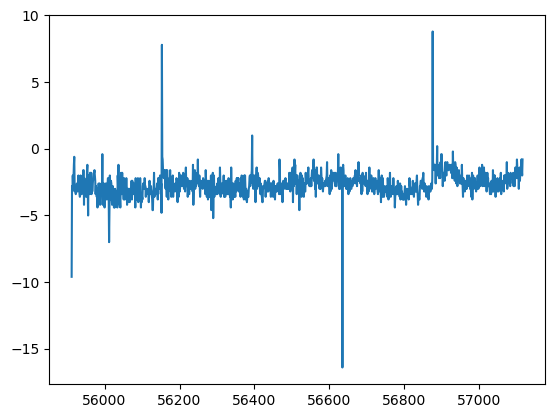

In [2]:
df[df["date"].isin(['2025-01-10', '2025-01-13', '2025-01-14', '2025-01-15',
       '2025-01-16'])]['spread'].plot()

In [24]:
df[df['date']<'2024-12-20']['date'].unique()[-4:]

array(['2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19'],
      dtype=object)

In [31]:
df[df["date"].isin(df[df['date']<'2024-10-18']['date'].unique()[-5:])]

,time,IF00_close,IF01_close,spread,date,hour,minute,Expiration_Date
40488,2024-10-11 09:30:00,3999.8,3998.0,-1.8,2024-10-11,9,30,0
40489,2024-10-11 09:31:00,3973.6,3975.0,1.4,2024-10-11,9,31,0
40490,2024-10-11 09:32:00,3988.0,3984.6,-3.4,2024-10-11,9,32,0
40491,2024-10-11 09:33:00,3973.8,3971.0,-2.8,2024-10-11,9,33,0
40492,2024-10-11 09:34:00,3974.0,3970.4,-3.6,2024-10-11,9,34,0
...,...,...,...,...,...,...,...,...
41688,2024-10-17 14:56:00,3785.8,3785.2,-0.6,2024-10-17,14,56,0
41689,2024-10-17 14:57:00,3786.0,3784.6,-1.4,2024-10-17,14,57,0
41690,2024-10-17 14:58:00,3784.2,3784.2,0.0,2024-10-17,14,58,0
41691,2024-10-17 14:59:00,3782.8,3783.2,0.4,2024-10-17,14,59,0


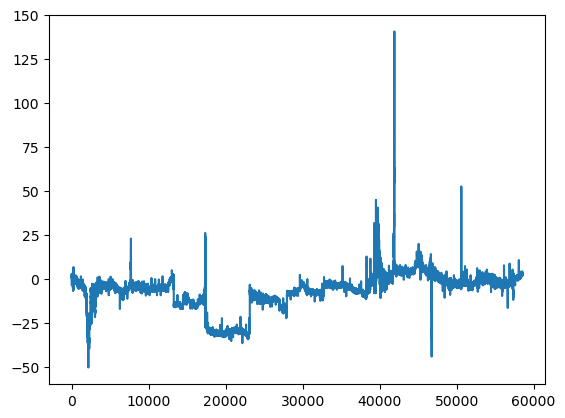

In [5]:

timeseries = df[["spread"]].values.astype('float32')

plt.plot(timeseries[:,0])
plt.show()

In [6]:
# train-test split for time series



import torch

def create_dataset(dataset, lookback,split_index):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """


    X_train, y_train = [], []
    X_test, y_test = [], []
    # X_train_date,y_train_date = [],[]
    # X_test_date,y_test_date = [],[]
    for i in range(lookback, len(dataset)-1):
        if i <= split_index:
            feature = dataset[i-lookback:i]
            target = dataset[i:i+1][:,0:1]
            X_train.append(feature)
            y_train.append(target)
        else:
            feature = dataset[i-lookback:i]
            target = dataset[i:i+1][:,0:1]
            X_test.append(feature)
            y_test.append(target)
    # X = np.array(X)
    # y = np.array(y)
    return torch.tensor(X_train), torch.tensor(y_train),torch.tensor(X_test), torch.tensor(y_test)





In [7]:
# train_size = int(len(timeseries) * 0.67)
# test_size = len(timeseries) - train_size
# train, test = timeseries[:train_size], timeseries[train_size:]
# lookback = LOOKBACK 
# X_train_all, y_train_all = create_dataset(train, lookback=lookback)
# X_test, y_test = create_dataset(test, lookback=lookback)
# print(X_train_all.shape, y_train_all.shape)
# print(X_test.shape, y_test.shape)

# indices = np.arange(len(X_train_all))   
# np.random.shuffle(indices)
# train_val_size = int(len(X_train_all) * 0.8)
# train_indices = indices[:train_val_size]
# val_indices = indices[train_val_size:]
# X_train = X_train_all[train_indices]
# y_train = y_train_all[train_indices]
# X_val = X_train_all[val_indices]
# y_val = y_train_all[val_indices]

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# X_train = X_train.to(device)
# y_train = y_train.to(device)
# X_val = X_val.to(device)
# y_val = y_val.to(device)
# X_test = X_test.to(device)
# y_test = y_test.to(device)


In [8]:
import torch
import torch.nn as nn
import numpy as np

class DeepTrendDecomposer(nn.Module):
    def __init__(self, window_size=5):
        super().__init__()
        # 使用大窗口卷积捕获低频趋势
        self.trend_extractor = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=16, kernel_size=window_size, padding='same'),
            nn.ReLU(),
            nn.Conv1d(16, 1, kernel_size=window_size, padding='same')
        )
        
    def forward(self, x):
        # 输入形状: (batch_size, seq_len)
        x = x.permute(0,2,1)  # 添加通道维度 -> (B, 1, T)
        # print(x.shape)
        trend = self.trend_extractor(x)  # (B, 1, T)
        residual = x - trend
        return trend, residual

# # 使用示例
# model = DeepTrendDecomposer(window_size=7)
# input_seq = torch.randn(32, 100)  # batch_size=32, seq_len=100
# trend, residual = model(input_seq)


In [9]:
# trend.shape 

In [10]:
class EarlyStopping:
    def __init__(self, patience=7, min_delta=0, verbose=False):
        """
        Early stopping to stop the training when the loss does not improve after
        certain epochs.
        
        Args:
            patience (int): How many epochs to wait before stopping when loss is
                           not improving
            min_delta (float): Minimum change in the monitored quantity to
                             qualify as an improvement
            verbose (bool): If True, prints a message for each validation loss improvement
        """
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        
    def __call__(self, val_loss, model, optimizer, epoch):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model, optimizer, epoch)
        elif val_loss > self.best_loss + self.min_delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model, optimizer, epoch)
            self.counter = 0
            
    def save_checkpoint(self, val_loss, model, optimizer, epoch):
        """Saves model when validation loss decreases."""
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

In [11]:


class TrendAwareLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50):
        super().__init__()
        self.decomposer =  DeepTrendDecomposer(window_size=7)
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, 1)


    def forward(self, x):
        # 分解趋势
        trend, residual = self.decomposer(x)
        # print(trend.shape,residual.shape)
        
        # 用LSTM预测残差
        trend = trend.permute(0,2,1)
        residual = residual.permute(0,2,1)
        # residual = residual.unsqueeze(-1)  # (B, T, 1)
        lstm_out, _ = self.lstm(residual)
        pred_residual = self.linear(lstm_out[:, -1, :])
        
        # 预测趋势（简单移动平均）
        pred_trend = trend[:, -1].unsqueeze(-1)  # 假设趋势缓慢变化
        
        return pred_trend + pred_residual
# model = TrendAwareLSTM().to(device)
# model 

# sum(para.numel() for para in model.parameters())

In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TrendAwareLSTM().to(device)
model 

sum(para.numel() for para in model.parameters())

10892

In [34]:
model

TrendAwareLSTM(
  (decomposer): DeepTrendDecomposer(
    (trend_extractor): Sequential(
      (0): Conv1d(1, 16, kernel_size=(7,), stride=(1,), padding=same)
      (1): ReLU()
      (2): Conv1d(16, 1, kernel_size=(7,), stride=(1,), padding=same)
    )
  )
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [13]:
split_index = 55911
lookback = LOOKBACK 
X_train_all, y_train_all,X_test, y_test = create_dataset(timeseries, lookback=lookback,split_index=split_index)
# X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train_all.shape, y_train_all.shape)
print(X_test.shape, y_test.shape)

indices = np.arange(len(X_train_all))   
np.random.shuffle(indices)
train_val_size = int(len(X_train_all) * 0.8)
train_indices = indices[:train_val_size]
val_indices = indices[train_val_size:]
X_train = X_train_all[train_indices]
y_train = y_train_all[train_indices]
X_val = X_train_all[val_indices]
y_val = y_train_all[val_indices]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train = X_train.to(device)
y_train = y_train.to(device)
X_val = X_val.to(device)
y_val = y_val.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

/tmp/ipykernel_1712/3213239883.py:33: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  return torch.tensor(X_train), torch.tensor(y_train),torch.tensor(X_test), torch.tensor(y_test)


torch.Size([55812, 100, 1]) torch.Size([55812, 1, 1])
torch.Size([2650, 100, 1]) torch.Size([2650, 1, 1])


In [14]:
# y_test

In [15]:
# X_test

In [16]:
# trend,redisual = model.decomposer(X_train)



In [27]:

# trend,redisual = model.decomposer(X_test[0,:,:].unsqueeze(0))
# trend = trend.cpu().detach().numpy()
# redisual = redisual.cpu().detach().numpy()
# true_value = X_test[0,:,:].cpu().detach().numpy()
# x = df.iloc[split_index-LOOKBACK:split_index]['time'].values 
# df_trend_result = pd.DataFrame(trend.flatten(),columns=['trend'])
# df_trend_result['redisual'] = redisual.flatten()
# df_trend_result['true_value'] = true_value.flatten()
# df_trend_result['time'] = x

# if not os.path.exists('./data/df_trend_result.csv'):
#     df_trend_result.to_csv('./data/df_trend_result.csv',sep='\t')
# else:
#     df_trend_result.to_csv('./data/df_trend_result.csv',sep='\t',mode='a',header=False)

In [35]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data
import time 
begin_time = time.time()
df_result = pd.DataFrame()

for split_index in range(40488,41692,100): #, len(timeseries)
    train_size = split_index # 
    # test_size = len(timeseries) - train_size
    # train, test = timeseries[:train_size], timeseries[train_size:]
    lookback = LOOKBACK 
    X_train_all, y_train_all,X_test, y_test = create_dataset(timeseries, lookback=lookback,split_index=split_index)
    # X_test, y_test = create_dataset(test, lookback=lookback)
    print(X_train_all.shape, y_train_all.shape)
    print(X_test.shape, y_test.shape)

    indices = np.arange(len(X_train_all))   
    np.random.shuffle(indices)
    train_val_size = int(len(X_train_all) * 0.8)
    train_indices = indices[:train_val_size]
    val_indices = indices[train_val_size:]
    X_train = X_train_all[train_indices]
    y_train = y_train_all[train_indices]
    X_val = X_train_all[val_indices]
    y_val = y_train_all[val_indices]

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    X_train = X_train.to(device)
    y_train = y_train.to(device)
    X_val = X_val.to(device)
    y_val = y_val.to(device)
    X_test = X_test.to(device)
    y_test = y_test.to(device)

    model = TrendAwareLSTM().to(device)
    model 


    optimizer = optim.Adam(model.parameters())
    loss_fn = nn.MSELoss()
    loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=BATCHSIZE)
    early_stopping = EarlyStopping(patience=10, min_delta=0.001)
    n_epochs = 1000
    for epoch in range(n_epochs):
        model.train()
        for X_batch, y_batch in loader:
            # print(X_batch.shape)
            # X_batch = X_batch.to(device)
            # y_batch = y_batch.to(device)
            y_pred = model(X_batch)
            y_pred_val = model(X_val)
            # print(y_pred.shape,y_batch.shape)
            loss_train = loss_fn(y_pred, y_batch)
            
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()
        # Validation
        loss_val = loss_fn(y_pred_val, y_val)
        early_stopping(loss_val, model, optimizer, epoch)

        if early_stopping.early_stop:
            print("Early stopping")
            break

    model.eval()
    # with torch.no_grad():
        # X_train = X_train.to(device)
        # y_train = y_train.to(device)
        # y_pred_train = model(X_train)
        # X_test = X_test.to(device)
        # y_test = y_test.to(device)
        # train_rmse = torch.sqrt(loss_fn(y_pred_train, y_train))
        # y_pred_test = model(X_test)
        # test_rmse = torch.sqrt(loss_fn(y_pred_test, y_test))
    # print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
    end_time = time.time()
    print(f"训练时间: {end_time - begin_time} 秒")

    predict_value = model(X_test[0,:,:].unsqueeze(0))
    predict_value = predict_value.detach().cpu().numpy().flatten()


    df_result_tmp = pd.DataFrame([[split_index, predict_value[0],y_test[0].flatten().cpu().numpy()[0]]],columns=['split_index','predict','true'])
    df_result_tmp
    # df_result = pd.concat([df_result,df_result_tmp],ignore_index=True)
    df_result_tmp.to_csv(f'./data/lstm_with_trends_result_{LOOKBACK}.csv',index=False,mode='a')


    trend,redisual = model.decomposer(X_test[0,:,:].unsqueeze(0))
    trend = trend.cpu().detach().numpy()
    redisual = redisual.cpu().detach().numpy()
    test = X_test[0,:,:].cpu().detach().numpy()
    x = df.iloc[split_index:split_index+100,0].values 
    df_trend_result = pd.DataFrame(trend.flatten(),columns=['trend'])
    df_trend_result['redisual'] = redisual.flatten()
    df_trend_result['ftrue'] = test.flatten()
    df_trend_result['time'] = x
    df_trend_result 
    if not os.path.exists('./data/df_trend_result_2410.csv'):
        df_trend_result.to_csv('./data/df_trend_result_2410.csv',sep='\t')
    else:
        df_trend_result.to_csv('./data/df_trend_result_2410.csv',sep='\t',mode='a',header=False)

    # trend,redisual = model.decomposer(X_test[0,:,:].unsqueeze(0))
    # trend = trend.cpu().detach().numpy()
    # redisual = redisual.cpu().detach().numpy()
    # true_value = X_test[0,:,:].cpu().detach().numpy()
    # x = df.iloc[split_index-LOOKBACK:split_index]['time'].values 
    # df_trend_result = pd.DataFrame(trend.flatten(),columns=['trend'])
    # df_trend_result['redisual'] = redisual.flatten()
    # df_trend_result['true_value'] = true_value.flatten()
    # df_trend_result['time'] = x
    
    # if not os.path.exists('./data/df_trend_result.csv'):
    #     df_trend_result.to_csv('./data/df_trend_result.csv',sep='\t')
    # else:
    #     df_trend_result.to_csv('./data/df_trend_result.csv',sep='\t',mode='a',header=False)
    
    del model
    del optimizer
    del loader
    del early_stopping
    del X_train
    del y_train
    del X_train_all
    del y_train_all
    del X_val
    del y_val
    del X_test
    del y_test
    # del y_pred_train
    # del y_pred_test
    # del y_pred_val
    del y_pred
    del y_batch
    del X_batch
    torch.cuda.empty_cache()
    

torch.Size([40389, 100, 1]) torch.Size([40389, 1, 1])
torch.Size([18073, 100, 1]) torch.Size([18073, 1, 1])


/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([256, 1, 1])) that is different to the input size (torch.Size([256, 256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([55, 1, 1])) that is different to the input size (torch.Size([55, 55, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([8078, 1, 1])) that is different to the input size (torch.Size([8078, 8078, 1])). This will likely lead to incorrect results due to broadcasting.

Early stopping
训练时间: 68.79297757148743 秒
torch.Size([40489, 100, 1]) torch.Size([40489, 1, 1])
torch.Size([17973, 100, 1]) torch.Size([17973, 1, 1])


/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([256, 1, 1])) that is different to the input size (torch.Size([256, 256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([135, 1, 1])) that is different to the input size (torch.Size([135, 135, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([8098, 1, 1])) that is different to the input size (torch.Size([8098, 8098, 1])). This will likely lead to incorrect results due to broadcasti

Early stopping
训练时间: 170.80767369270325 秒
torch.Size([40589, 100, 1]) torch.Size([40589, 1, 1])
torch.Size([17873, 100, 1]) torch.Size([17873, 1, 1])


/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([256, 1, 1])) that is different to the input size (torch.Size([256, 256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([215, 1, 1])) that is different to the input size (torch.Size([215, 215, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([8118, 1, 1])) that is different to the input size (torch.Size([8118, 8118, 1])). This will likely lead to incorrect results due to broadcasti

Early stopping
训练时间: 383.8803162574768 秒
torch.Size([40689, 100, 1]) torch.Size([40689, 1, 1])
torch.Size([17773, 100, 1]) torch.Size([17773, 1, 1])


/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([256, 1, 1])) that is different to the input size (torch.Size([256, 256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([39, 1, 1])) that is different to the input size (torch.Size([39, 39, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([8138, 1, 1])) that is different to the input size (torch.Size([8138, 8138, 1])). This will likely lead to incorrect results due to broadcasting.

Early stopping
训练时间: 474.8942732810974 秒
torch.Size([40789, 100, 1]) torch.Size([40789, 1, 1])
torch.Size([17673, 100, 1]) torch.Size([17673, 1, 1])


/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([256, 1, 1])) that is different to the input size (torch.Size([256, 256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([119, 1, 1])) that is different to the input size (torch.Size([119, 119, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([8158, 1, 1])) that is different to the input size (torch.Size([8158, 8158, 1])). This will likely lead to incorrect results due to broadcasti

Early stopping
训练时间: 582.1794896125793 秒
torch.Size([40889, 100, 1]) torch.Size([40889, 1, 1])
torch.Size([17573, 100, 1]) torch.Size([17573, 1, 1])


/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([256, 1, 1])) that is different to the input size (torch.Size([256, 256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([199, 1, 1])) that is different to the input size (torch.Size([199, 199, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([8178, 1, 1])) that is different to the input size (torch.Size([8178, 8178, 1])). This will likely lead to incorrect results due to broadcasti

Early stopping
训练时间: 745.0776789188385 秒
torch.Size([40989, 100, 1]) torch.Size([40989, 1, 1])
torch.Size([17473, 100, 1]) torch.Size([17473, 1, 1])


/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([256, 1, 1])) that is different to the input size (torch.Size([256, 256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([23, 1, 1])) that is different to the input size (torch.Size([23, 23, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([8198, 1, 1])) that is different to the input size (torch.Size([8198, 8198, 1])). This will likely lead to incorrect results due to broadcasting.

Early stopping
训练时间: 822.0282120704651 秒
torch.Size([41089, 100, 1]) torch.Size([41089, 1, 1])
torch.Size([17373, 100, 1]) torch.Size([17373, 1, 1])


/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([256, 1, 1])) that is different to the input size (torch.Size([256, 256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([103, 1, 1])) that is different to the input size (torch.Size([103, 103, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([8218, 1, 1])) that is different to the input size (torch.Size([8218, 8218, 1])). This will likely lead to incorrect results due to broadcasti

Early stopping
训练时间: 855.2433135509491 秒
torch.Size([41189, 100, 1]) torch.Size([41189, 1, 1])
torch.Size([17273, 100, 1]) torch.Size([17273, 1, 1])


/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([256, 1, 1])) that is different to the input size (torch.Size([256, 256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([183, 1, 1])) that is different to the input size (torch.Size([183, 183, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([8238, 1, 1])) that is different to the input size (torch.Size([8238, 8238, 1])). This will likely lead to incorrect results due to broadcasti

Early stopping
训练时间: 923.1850454807281 秒
torch.Size([41289, 100, 1]) torch.Size([41289, 1, 1])
torch.Size([17173, 100, 1]) torch.Size([17173, 1, 1])


/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([256, 1, 1])) that is different to the input size (torch.Size([256, 256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([7, 1, 1])) that is different to the input size (torch.Size([7, 7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([8258, 1, 1])) that is different to the input size (torch.Size([8258, 8258, 1])). This will likely lead to incorrect results due to broadcasting. Pl

Early stopping
训练时间: 1035.3523366451263 秒
torch.Size([41389, 100, 1]) torch.Size([41389, 1, 1])
torch.Size([17073, 100, 1]) torch.Size([17073, 1, 1])


/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([256, 1, 1])) that is different to the input size (torch.Size([256, 256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([87, 1, 1])) that is different to the input size (torch.Size([87, 87, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([8278, 1, 1])) that is different to the input size (torch.Size([8278, 8278, 1])). This will likely lead to incorrect results due to broadcasting.

Early stopping
训练时间: 1103.6255073547363 秒
torch.Size([41489, 100, 1]) torch.Size([41489, 1, 1])
torch.Size([16973, 100, 1]) torch.Size([16973, 1, 1])


/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([256, 1, 1])) that is different to the input size (torch.Size([256, 256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([167, 1, 1])) that is different to the input size (torch.Size([167, 167, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([8298, 1, 1])) that is different to the input size (torch.Size([8298, 8298, 1])). This will likely lead to incorrect results due to broadcasti

Early stopping
训练时间: 1269.5759382247925 秒
torch.Size([41589, 100, 1]) torch.Size([41589, 1, 1])
torch.Size([16873, 100, 1]) torch.Size([16873, 1, 1])


/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([256, 1, 1])) that is different to the input size (torch.Size([256, 256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([247, 1, 1])) that is different to the input size (torch.Size([247, 247, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/envs/app/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([8318, 1, 1])) that is different to the input size (torch.Size([8318, 8318, 1])). This will likely lead to incorrect results due to broadcasti

Early stopping
训练时间: 1415.2526545524597 秒


In [13]:
# trend,redisual = model.decomposer(X_test[0,:,:].unsqueeze(0))


<Axes: >

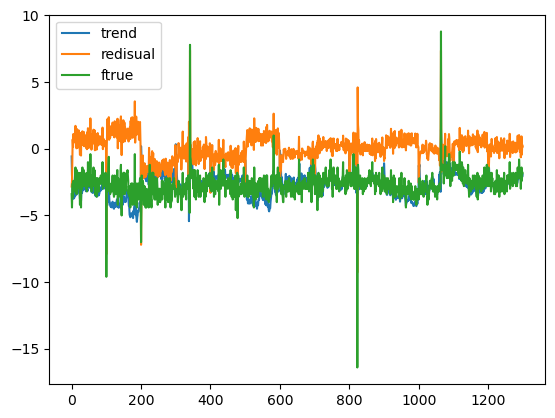

In [16]:
df_trend_result = pd.read_csv('./data/df_trend_result.csv',sep='\t')


In [19]:
df_trend_result['time'] = pd.to_datetime(df_trend_result['time'])
df_trend_result = df_trend_result.set_index('time')

<Axes: xlabel='time'>

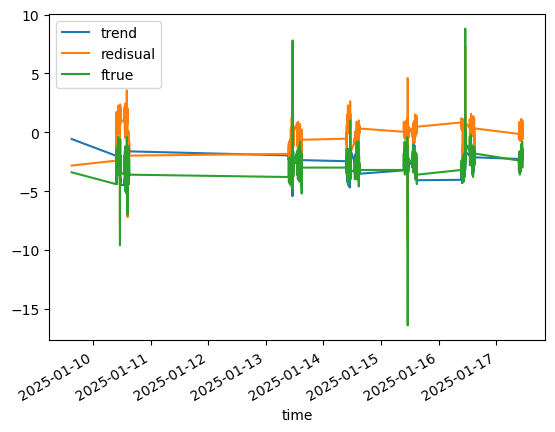

In [20]:
df_trend_result[['trend','redisual','ftrue']].plot()

In [15]:
df_trend_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1300 non-null   int64  
 1   trend       1300 non-null   float64
 2   redisual    1300 non-null   float64
 3   ftrue       1300 non-null   float64
 4   time        1300 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 50.9+ KB


In [ ]:
plt.plot(trend.flatten(),label='trend' )
plt.plot(redisual.flatten(),label='redisual' )

plt.plot(test.flatten(),label='true' )
plt.legend()

plt.show()

In [ ]:
# trend,redisual = model.decomposer(X_test[0,:,:].unsqueeze(0))
# trend = trend.cpu().detach().numpy()
# redisual = redisual.cpu().detach().numpy()
# test = X_test[0,:,:].cpu().detach().numpy()
# x = df.iloc[split_index:split_index+100,0].values 
# df_trend_result = pd.DataFrame(trend.flatten(),columns=['trend'])
# df_trend_result['redisual'] = redisual.flatten()
# df_trend_result['ftrue'] = test.flatten()
# df_trend_result['time'] = x
# df_trend_result 
# if not os.path.exists('./data/df_trend_result.csv'):
#     df_trend_result.to_csv('./data/df_trend_result.csv',sep='\t')
# else:
#     df_trend_result.to_csv('./data/df_trend_result.csv',sep='\t',mode='a',header=False)

In [ ]:
plt.plot(trend.flatten(),label='trend' )
plt.plot(redisual.flatten(),label='redisual' )

plt.plot(test.flatten(),label='true' )
plt.legend()

plt.show()

In [24]:
import plotly.graph_objects as go

# 假设 x, trend, residual, test 已是展平的 numpy 数组
# 如果尚未展平，可用 numpy.flatten() 或 ravel()

fig = go.Figure()

# 添加趋势线（trend）
fig.add_trace(go.Scatter(
    x=x,
    y=trend.flatten(),  # 确保数据是一维数组
    mode='lines',
    name='trend',
    line=dict(color='blue')  # 可自定义颜色
))

# 添加残差线（residual，注意原代码拼写为 redisual）
fig.add_trace(go.Scatter(
    x=x,
    y=redisual.flatten(),  # 修正变量名拼写为 residual
    mode='lines',
    name='residual',       # 保持标签拼写一致
    line=dict(color='orange')
))

# 添加真实值线（true）
fig.add_trace(go.Scatter(
    x=x,
    y=test.flatten(),
    mode='lines',
    name='true',
    line=dict(color='green')
))

# 设置布局
fig.update_layout(
    title='Components Visualization',
    xaxis_title='X Axis',
    yaxis_title='Y Axis',
    legend=dict(
        x=0.8,   # 图例位置调整（0-1相对坐标）
        y=0.95,
        bgcolor='rgba(255,255,255,0.5)'  # 半透明背景
    ),
    hovermode='x unified'  # 显示共享x轴的悬停信息
)

# 保存为 HTML
fig.write_html("plot.html")  # 默认保存到当前工作目录

In [44]:
# !pip install nbformat

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [13]:
def train(model,first_index,end_index,steps,LOOKBACK,BATCHSIZE):
    import numpy as np
    import torch.optim as optim
    import torch.utils.data as data
    import time 
    begin_time = time.time()
    df_result = pd.DataFrame()

    for split_index in range(first_index,end_index,steps): #, len(timeseries)
        train_size = split_index # 
        # test_size = len(timeseries) - train_size
        # train, test = timeseries[:train_size], timeseries[train_size:]
        # lookback = LOOKBACK 
        X_train_all, y_train_all,X_test, y_test = create_dataset(timeseries, lookback=lookback,split_index=split_index)
        # X_test, y_test = create_dataset(test, lookback=lookback)
        print(X_train_all.shape, y_train_all.shape)
        print(X_test.shape, y_test.shape)

        indices = np.arange(len(X_train_all))   
        np.random.shuffle(indices)
        train_val_size = int(len(X_train_all) * 0.8)
        train_indices = indices[:train_val_size]
        val_indices = indices[train_val_size:]
        X_train = X_train_all[train_indices]
        y_train = y_train_all[train_indices]
        X_val = X_train_all[val_indices]
        y_val = y_train_all[val_indices]

        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        X_train = X_train.to(device)
        y_train = y_train.to(device)
        X_val = X_val.to(device)
        y_val = y_val.to(device)
        X_test = X_test.to(device)
        y_test = y_test.to(device)

        model = TrendAwareLSTM().to(device)
        model 


        optimizer = optim.Adam(model.parameters())
        loss_fn = nn.MSELoss()
        loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=BATCHSIZE)
        early_stopping = EarlyStopping(patience=10, min_delta=0.001)
        n_epochs = 1000
        for epoch in range(n_epochs):
            model.train()
            for X_batch, y_batch in loader:
                # print(X_batch.shape)
                # X_batch = X_batch.to(device)
                # y_batch = y_batch.to(device)
                y_pred = model(X_batch)
                y_pred_val = model(X_val)
                # print(y_pred.shape,y_batch.shape)
                loss_train = loss_fn(y_pred, y_batch)
                
                optimizer.zero_grad()
                loss_train.backward()
                optimizer.step()
            # Validation
            loss_val = loss_fn(y_pred_val, y_val)
            early_stopping(loss_val, model, optimizer, epoch)

            if early_stopping.early_stop:
                print("Early stopping")
                break

        model.eval()
        with torch.no_grad():
            # X_train = X_train.to(device)
            # y_train = y_train.to(device)
            y_pred_train = model(X_train)
            # X_test = X_test.to(device)
            # y_test = y_test.to(device)
            train_rmse = torch.sqrt(loss_fn(y_pred_train, y_train))
            y_pred_test = model(X_test)
            test_rmse = torch.sqrt(loss_fn(y_pred_test, y_test))
        print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
        end_time = time.time()
        print(f"训练时间: {end_time - begin_time} 秒")

        predict_value = model(X_test[0,:,:].unsqueeze(0))
        predict_value = predict_value.detach().cpu().numpy().flatten()


        df_result_tmp = pd.DataFrame([[split_index, predict_value[0],y_test[0].flatten().cpu().numpy()[0]]],columns=['split_index','predict','true'])
        df_result_tmp
        # df_result = pd.concat([df_result,df_result_tmp],ignore_index=True)
        name = model.__class__.__name__
        df_result_tmp.to_csv(f'./data/{name}_result_{LOOKBACK}_{BATCHSIZE}.csv',index=False,mode='a')


        trend,redisual = model.decomposer(X_test[0,:,:].unsqueeze(0))
        trend = trend.cpu().detach().numpy()
        redisual = redisual.cpu().detach().numpy()
        test = X_test[0,:,:].cpu().detach().numpy()
        x = df.iloc[split_index:split_index+100,0].values 
        df_trend_result = pd.DataFrame(trend.flatten(),columns=['trend'])
        df_trend_result['redisual'] = redisual.flatten()
        df_trend_result['ftrue'] = test.flatten()
        df_trend_result['time'] = x
        df_trend_result 
        if not os.path.exists('./data/df_trend_result.csv'):
            df_trend_result.to_csv('./data/df_trend_result.csv',sep='\t')
        else:
            df_trend_result.to_csv('./data/df_trend_result.csv',sep='\t',mode='a',header=False)
        
        del model
        del optimizer
        del loader
        del early_stopping
        del X_train
        del y_train
        del X_train_all
        del y_train_all
        del X_val
        del y_val
        del X_test
        del y_test
        del y_pred_train
        del y_pred_test
        del y_pred_val
        del y_pred
        del y_batch
        del X_batch
        torch.cuda.empty_cache()
        


In [14]:
# df_result_lstm = pd.read_csv('./data/lstm_with_trends_result.csv',sep=',')
# df_result_lstm = df_result_lstm[df_result_lstm['true']!='true']
# df_result_lstm['predict'] = df_result_lstm['predict'].astype(float)
# df_result_lstm['true'] = df_result_lstm['true'].astype(float)


# np.sqrt(np.mean((df_result_lstm['predict']-df_result_lstm['true'])**2))


In [15]:
import torch

# 假设有一个在循环中不断生成的 Tensor

x = torch.randn(30000, 30000)  # 创建 GPU 上的 Tensor

# ... 使用 x 完成计算 ...

# 删除引用并清空显存
# del x          # 删除 Python 变量引用
# torch.cuda.empty_cache()  # 强制清空未使用的显存缓存
print(torch.cuda.memory_summary())


# .shape 

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   2077 MiB |  23606 MiB |   4891 TiB |   4891 TiB |
|       from large pool |   2077 MiB |  23605 MiB |   4888 TiB |   4888 TiB |
|       from small pool |      0 MiB |      3 MiB |      2 TiB |      2 TiB |
|---------------------------------------------------------------------------|
| Active memory         |   2077 MiB |  23606 MiB |   4891 TiB |   4891 TiB |
|       from large pool |   2077 MiB |  23605 MiB |   4888 TiB |

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x = x.to(device)

In [17]:
del x 

In [18]:
torch.cuda.empty_cache()  # 强制清空未使用的显存缓存

In [19]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = torch.ones_like(torch.tensor(timeseries)) * np.nan
    X_train_all = X_train_all.to(device)
    y_pred = model(X_train_all)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train_all)[:, -1, :]
    # shift test predictions for plotting
    test_plot = torch.ones_like(torch.tensor(timeseries)) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
plt.plot(timeseries[:,0], c='b')
plt.plot(train_plot.cpu().numpy(), c='r')
plt.plot(test_plot.cpu().numpy(), c='g')
plt.show()

NameError: name 'X_train_all' is not defined

In [51]:

import plotly.graph_objects as go
import numpy as np

# 确保模型处于评估模式
model.eval()

# 生成预测
with torch.no_grad():
    # 训练集预测
    train_plot = np.ones_like(timeseries[:,0]) * np.nan
    train_plot[lookback:train_size] = model(X_train_all)[:, -1, :].cpu().numpy().flatten()
    
    # 测试集预测
    test_plot = np.ones_like(timeseries[:,0]) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :].cpu().numpy().flatten()

# 创建时间索引
time_index = np.arange(len(timeseries[:,0]))

# 创建交互式图表
fig = go.Figure()

# 添加原始数据线
fig.add_trace(go.Scatter(
    x=time_index,
    y=timeseries[:,0].flatten(),
    name='原始数据',
    line=dict(color='blue')
))

# 添加训练集预测线
fig.add_trace(go.Scatter(
    x=time_index,
    y=train_plot.flatten(),
    name='训练集预测',
    line=dict(color='red')
))

# 添加测试集预测线
fig.add_trace(go.Scatter(
    x=time_index,
    y=test_plot.flatten(),
    name='测试集预测',
    line=dict(color='green')
))

# 更新布局
fig.update_layout(
    title='LSTM时序预测结果',
    xaxis_title='时间步',
    yaxis_title='值',
    hovermode='x unified',  # 启用统一的悬停模式
    template='plotly_white'  # 使用白色主题
)

# 显示图表
# fig.show()

# 保存为HTML文件
fig.write_html('./html/lstm_timeseries_plot.html')

In [ ]:
X_test.shape[0] //100

In [ ]:
193*40/60